In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/beekiran/sales-data-analysis/Sales Data.csv


In [2]:
#  Load the Dataset
import pandas as pd

df = pd.read_csv('/kaggle/input/d/beekiran/sales-data-analysis/Sales Data.csv')

print(df.head())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New

In [3]:
# Adding revenue in a new column
df['Revenue'] = df['Price Each'] * df['Quantity Ordered']

# Verifing
print(df.head())


   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  Revenue  
0  1700.00   New York City     0  1700.00 

In [4]:
#here we are checking if there are any missing values are there in table

print(df.isnull().sum())

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
Revenue             0
dtype: int64


In [5]:
# Converting 'Date' Column to date format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [6]:
# Extract year, month, and day for analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

In [7]:
# Check updated dataset
print(df.head())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

           Order Date                        Purchase Address  Month    Sales  \
0 2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12  1700.00   
1 2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   600.00   
2 2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12    11.95   
3 2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   149.99   
4 2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour  Revenue  Year

In [8]:
# Assuming df is your DataFrame
most_sold = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)

print("Top 10 Most Sold Products:\n", most_sold)

Top 10 Most Sold Products:
 Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64


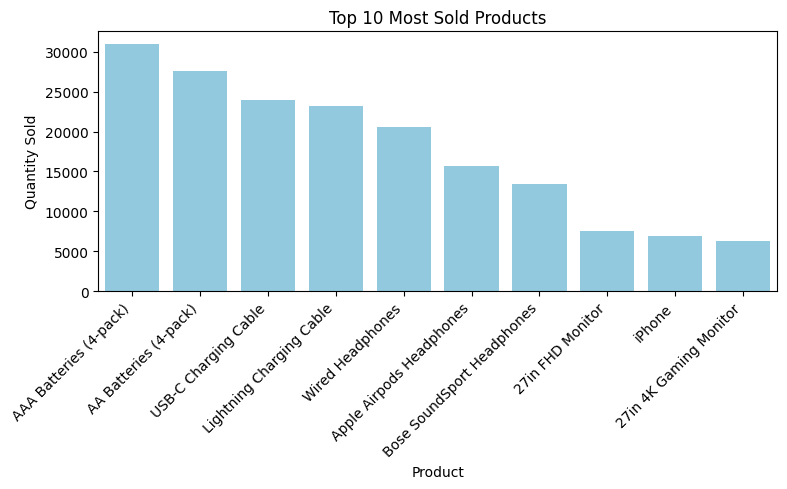

In [9]:
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns        # Import Seaborn for enhanced visualizations
#We are making an assumption that 'most_sold' is a series in Pandas with product name as index 
#and quantities sold as values.
#Incase 'mosy_sold' is a DataFrame or has a different index structure, adjustments to the x and y 
#parameters in sns.barplot are necessary.

plt.figure(figsize=(8, 5))  # Create a figure with specified size (width 8 inches, height 5 inches)

sns.barplot(x=most_sold.index, y=most_sold.values, color='skyblue') 
# Create a bar plot using Seaborn's barplot function:
# x-axis: product names (index of 'most_sold')
# y-axis: quantity sold (values of 'most_sold')
# bars colored 'skyblue'

plt.title('Top 10 Most Sold Products') 
# Set the title of the plot
plt.ylabel('Quantity Sold')           
# Set the label for the y-axis
plt.xlabel('Product')                 
# Set the label for the x-axis
plt.xticks(rotation=45, ha='right')  
# Rotate the x-axis labels by 45 degrees for readability, and right align the labels.
plt.tight_layout()
# Adjust subplot parameters to fit the plot within the figure area, preventing overlapping elements.

plt.show()  

In [10]:
# Assuming 'df' is your DataFrame containing 'Product' and 'Revenue' columns
# Calculating total revenue per product and sort in descending order
most_revenue = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
# Displaying the top 10 revenue-generating products
print("Top 10 Revenue-Generating Products:\n", most_revenue.head(10))


Top 10 Revenue-Generating Products:
 Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Name: Revenue, dtype: float64


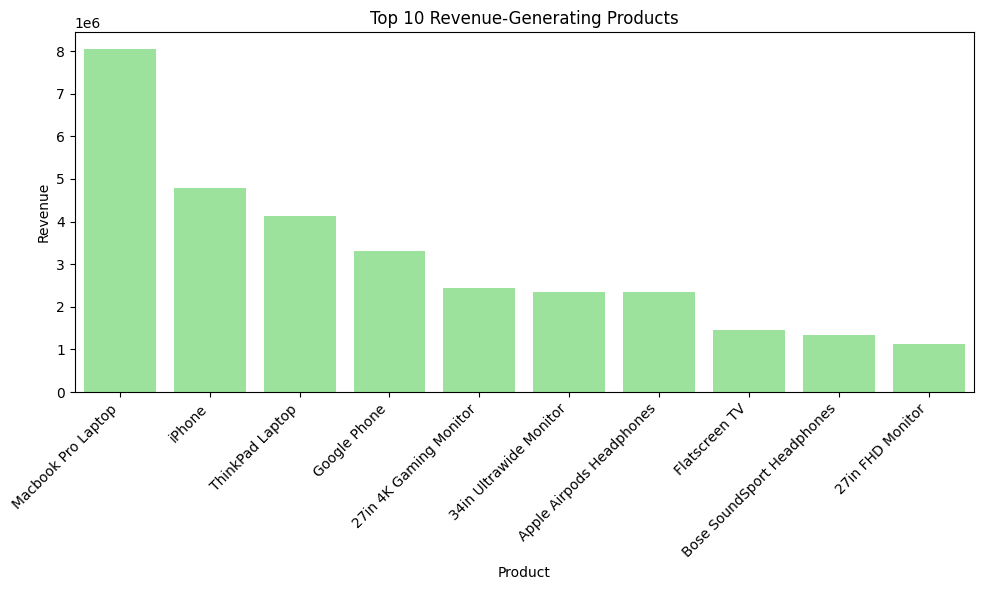

In [11]:
# Visualization using Seaborn
plt.figure(figsize=(10, 6))  # Increase figure size for better readability
sns.barplot(x=most_revenue.head(10).index, y=most_revenue.head(10).values, color='lightgreen')

plt.title('Top 10 Revenue-Generating Products')
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjusts the plot to fit into the figure area.
plt.show()

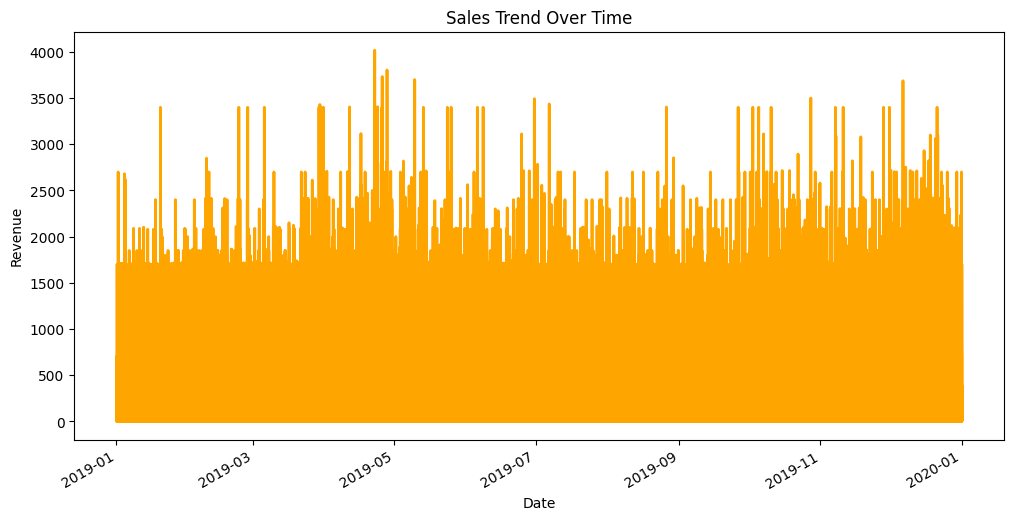

In [12]:
# Sales Trend Over Time

sales_trend = df.groupby('Order Date')['Revenue'].sum()

# Visualization
sales_trend.plot(figsize=(12, 6), color='orange', linewidth=2)
plt.title('Sales Trend Over Time')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.show()

In [13]:
# Which Month Had the Highest Sales?
# Extract the month from the Date column
df['Month'] = df['Order Date'].dt.month

# Group by Month and calculate total revenue
monthly_sales = df.groupby('Month')['Revenue'].sum().sort_values(ascending=True)
print("Monthly Sales:\n", monthly_sales)



Monthly Sales:
 Month
1     1822256.73
9     2097560.13
2     2202022.42
8     2244467.88
6     2577802.26
7     2647775.76
3     2807100.38
5     3152606.75
11    3199603.20
4     3390670.24
10    3736726.88
12    4613443.34
Name: Revenue, dtype: float64


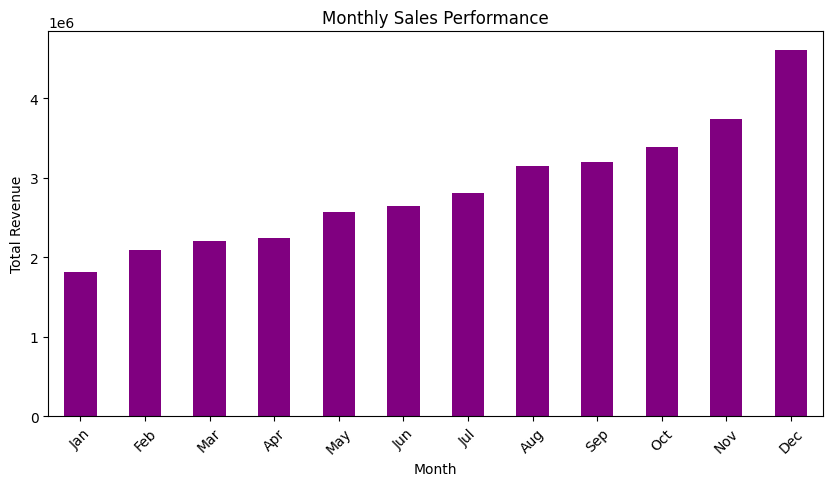

In [14]:
# Visualising monthly data 
monthly_sales.plot(kind='bar', color='purple', figsize=(10, 5))
plt.title('Monthly Sales Performance')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

In [15]:
# Peak Sales Day

# Group by Date and calculate total revenue
daily_sales = df.groupby('Order Date')['Revenue'].sum().sort_values(ascending=False)

# Display the date with the highest revenue
peak_sales_day = daily_sales.idxmax()
peak_sales_amount = daily_sales.max()
print(f"The peak sales day was {peak_sales_day}, with a revenue of {peak_sales_amount}.")


The peak sales day was 2019-04-22 13:26:00, with a revenue of 4017.94.


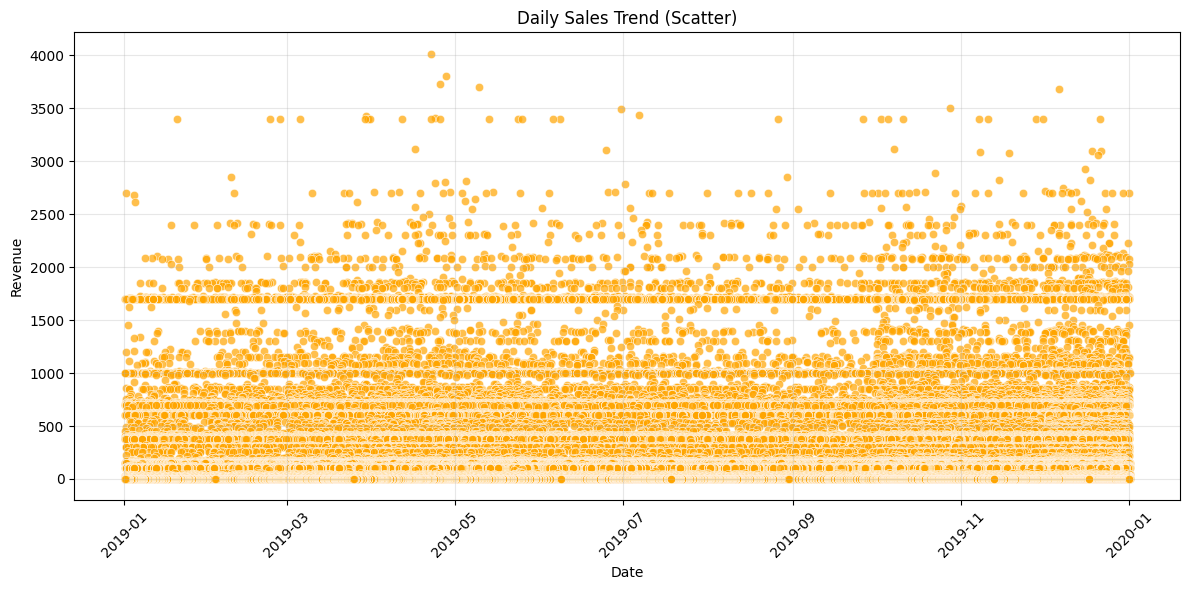

In [16]:

import seaborn as sns

# Assuming 'daily_sales' is a Pandas Series with Date as index and Revenue as values

plt.figure(figsize=(12, 6))

sns.scatterplot(x=daily_sales.index, y=daily_sales.values, color='orange', alpha=0.7)

plt.title('Daily Sales Trend (Scatter)')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout() #adjusts the plot to fit into the figure area.
plt.show()

In [17]:

# Calculate the average revenue per transaction using the mean() function
avg_revenue_per_transaction = df['Revenue'].mean()

# Print the result with formatting to two decimal places
print(f"Average Revenue per Transaction: ${avg_revenue_per_transaction:.2f}")

Average Revenue per Transaction: $185.49


In [18]:

# Calculate total quantity ordered per product and sort in descending order
top_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)

# Display the top 10 products by quantity sold
print("Top 10 Products by Quantity Sold:\n", top_products)


Top 10 Products by Quantity Sold:
 Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64


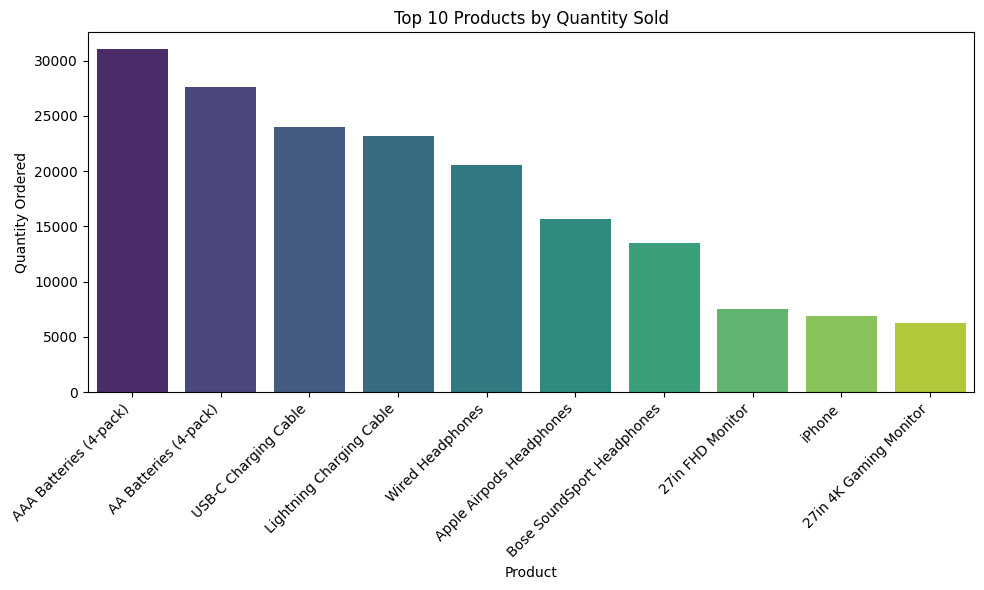

In [19]:

# Visualization using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')  # Use a color palette for better visual appeal

plt.title('Top 10 Products by Quantity Sold')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout() #adjusts the plot to fit into the figure area.
plt.show()

In [20]:

# Filtering rows with numeric data
valid_rows = df[
    pd.to_numeric(df['Price Each'], errors='coerce').notna() & 
    pd.to_numeric(df['Quantity Ordered'], errors='coerce').notna()
]

# Converting columns to numeric
valid_rows['Price Each'] = pd.to_numeric(valid_rows['Price Each'])
valid_rows['Quantity Ordered'] = pd.to_numeric(valid_rows['Quantity Ordered'])

# Retain only numeric columns for correlation
numeric_data = valid_rows.select_dtypes(include=['float64', 'int64'])

print("Numeric Data for Correlation:")
print(numeric_data.head())


Numeric Data for Correlation:
   Unnamed: 0  Order ID  Quantity Ordered  Price Each    Sales  Hour  Revenue
0           0    295665                 1     1700.00  1700.00     0  1700.00
1           1    295666                 1      600.00   600.00     7   600.00
2           2    295667                 1       11.95    11.95    18    11.95
3           3    295668                 1      149.99   149.99    15   149.99
4           4    295669                 1       11.95    11.95    12    11.95


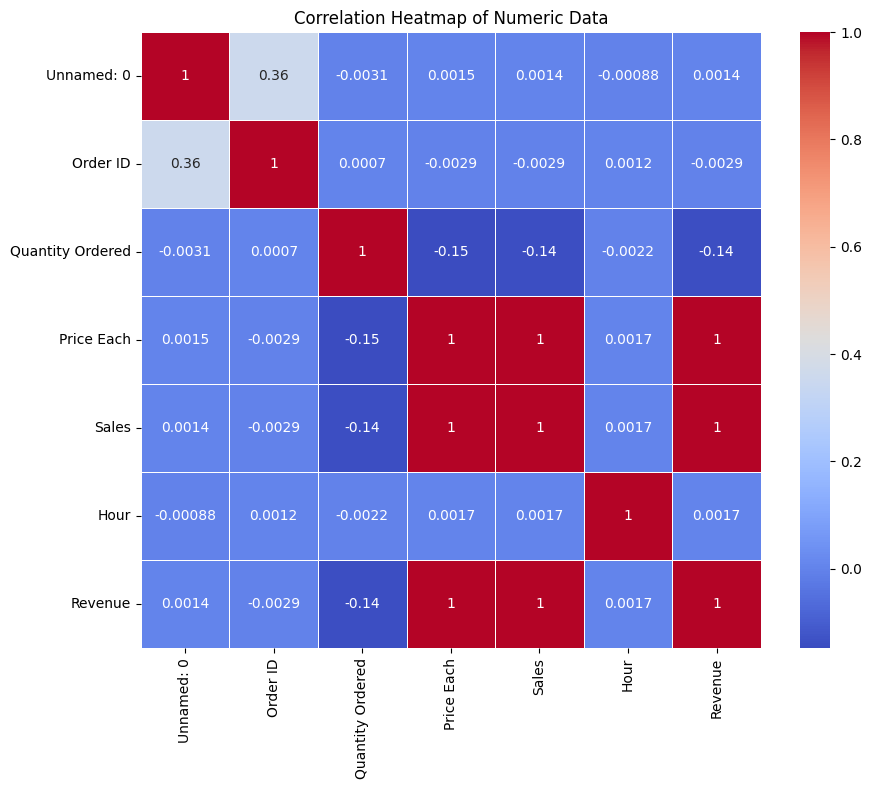

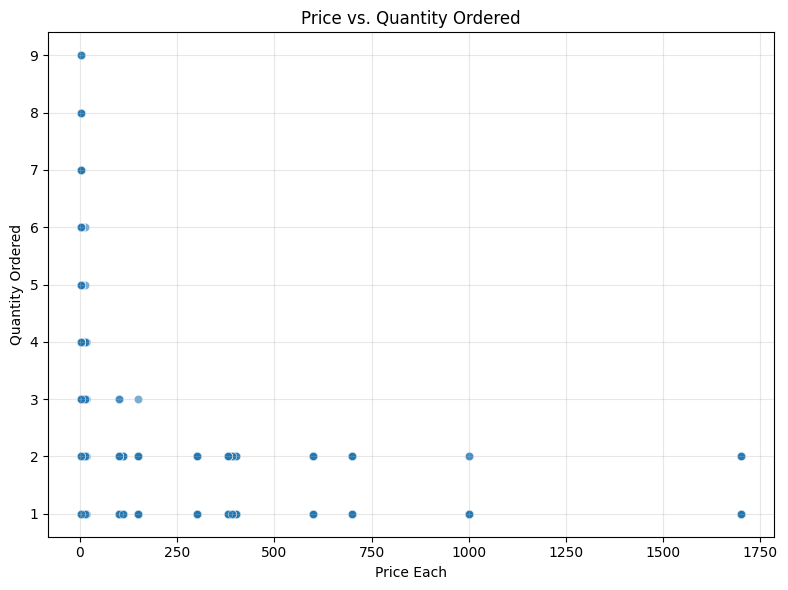

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

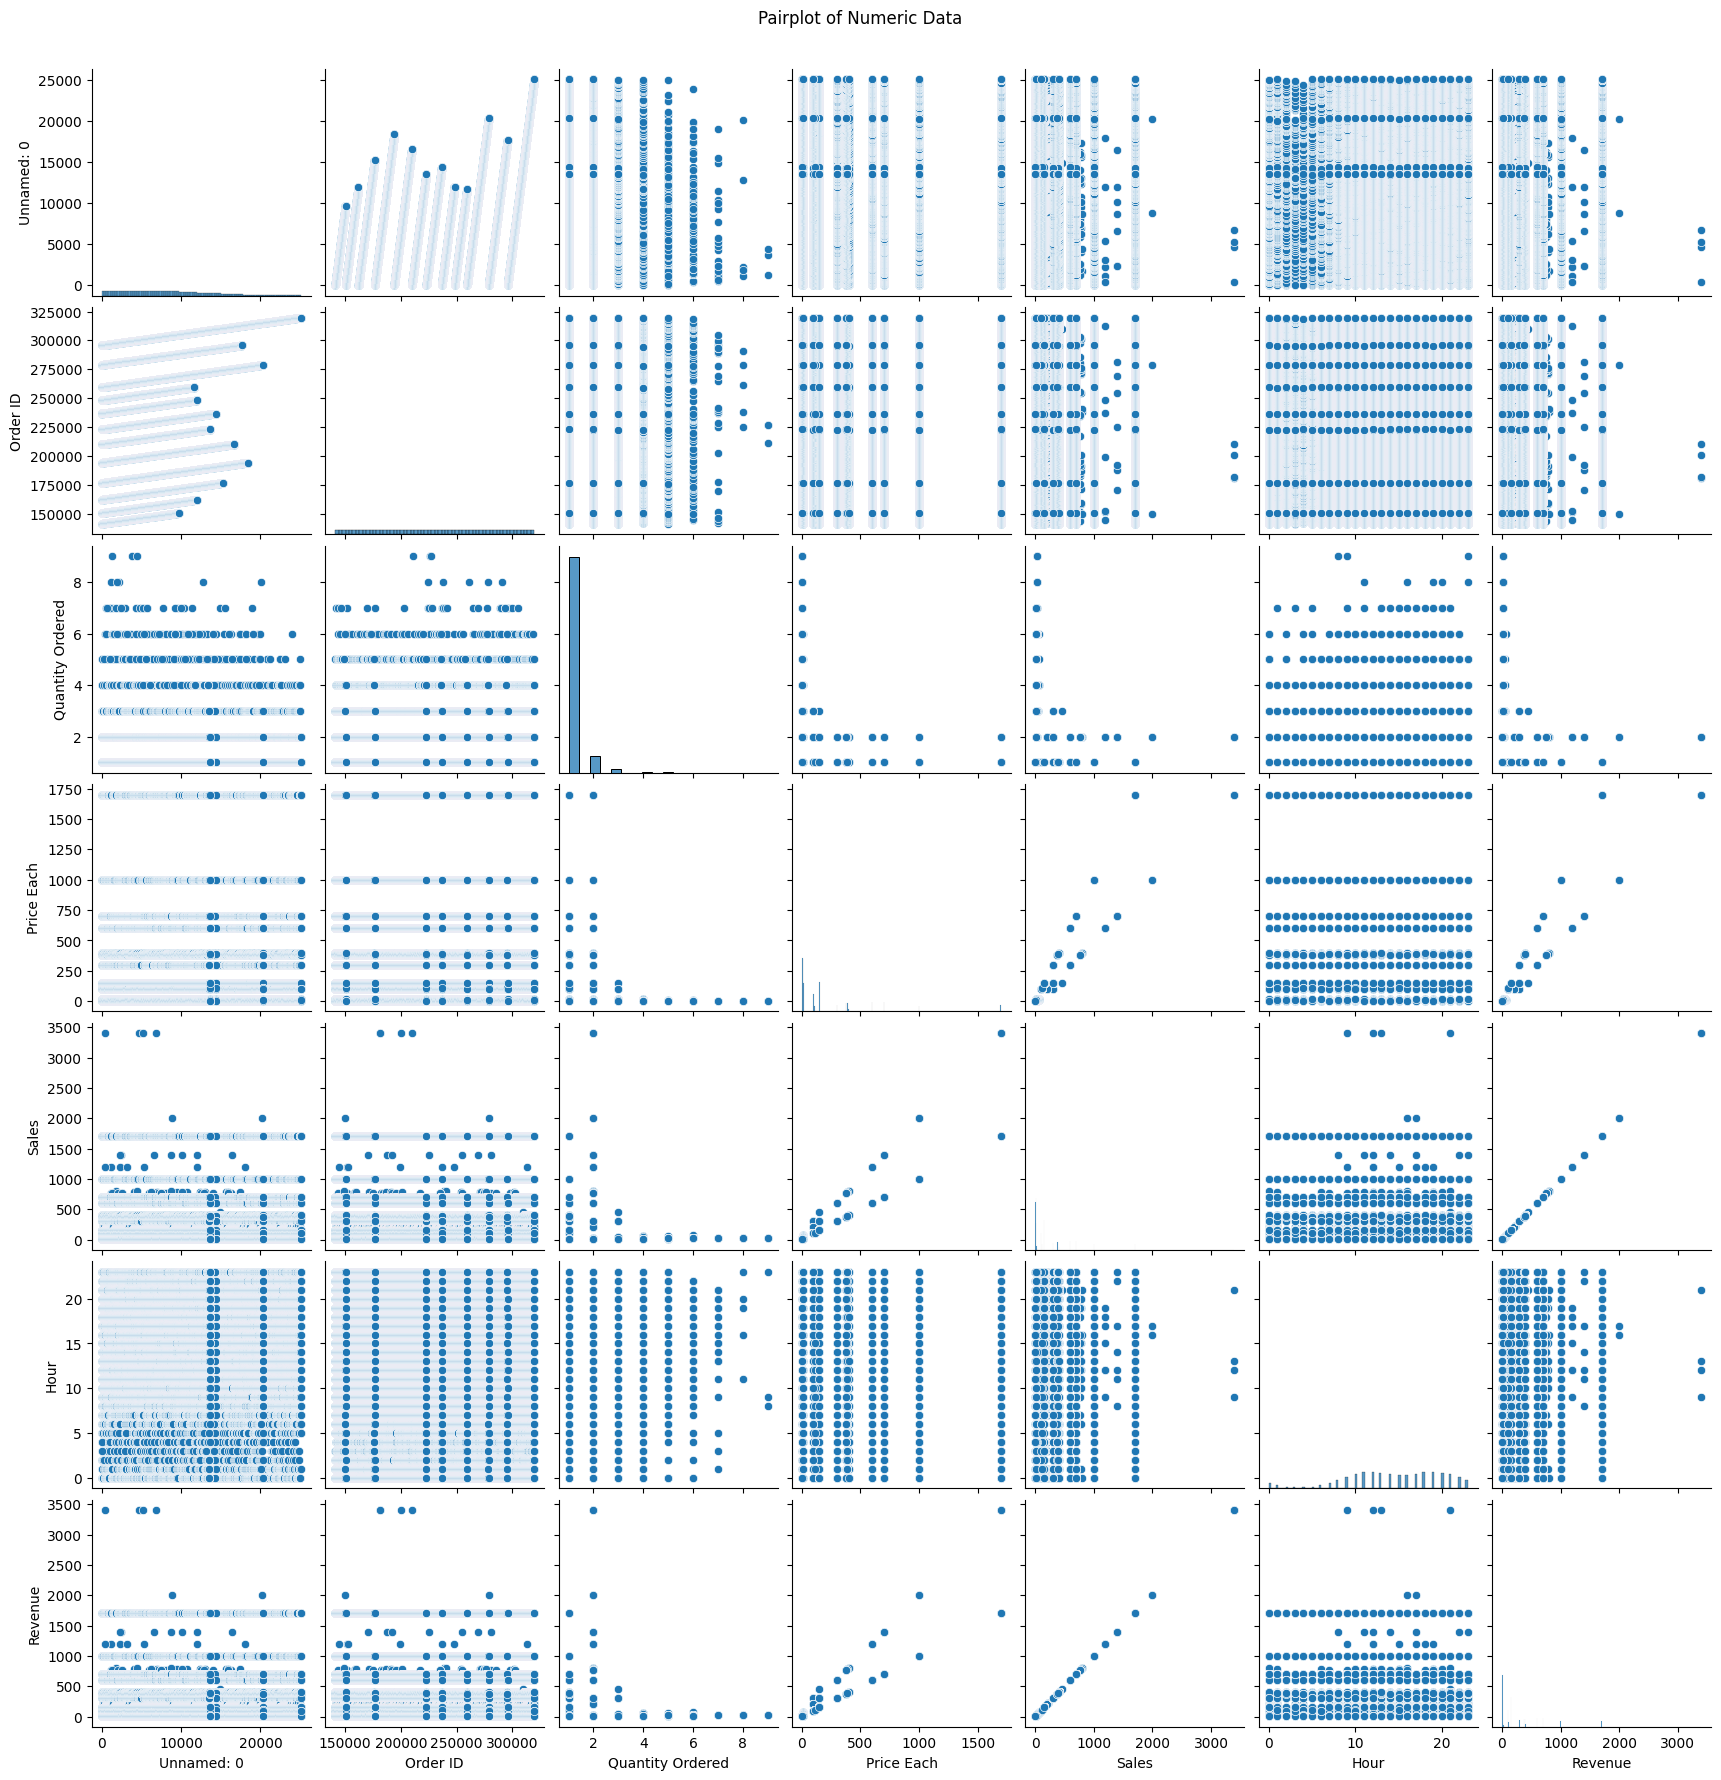

In [21]:

# Visualization: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numeric Data')
plt.show()

# Visualization: Scatter Plot of Price vs Quantity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price Each', y='Quantity Ordered', data=numeric_data, alpha=0.6)
plt.title('Price vs. Quantity Ordered')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Visualization: Pairplot
sns.pairplot(numeric_data)
plt.suptitle('Pairplot of Numeric Data', y=1.02)
plt.show()